In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/raw/customer_support_tickets.csv")

In [5]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ticket ID,8469.0,4235.000000,2444.934048,1.0,2118.0,4235.0,6352.0,8469.0
Customer Age,8469.0,44.026804,15.296112,18.0,31.0,44.0,57.0,70.0
Customer Satisfaction Rating,2769.0,2.991333,1.407016,1.0,2.0,3.0,4.0,5.0


### Ticket Type is our target. How many targets do we have?

In [9]:
df["Ticket Type"].value_counts()

Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: Ticket Type, dtype: int64

<Axes: xlabel='count', ylabel='Ticket Type'>

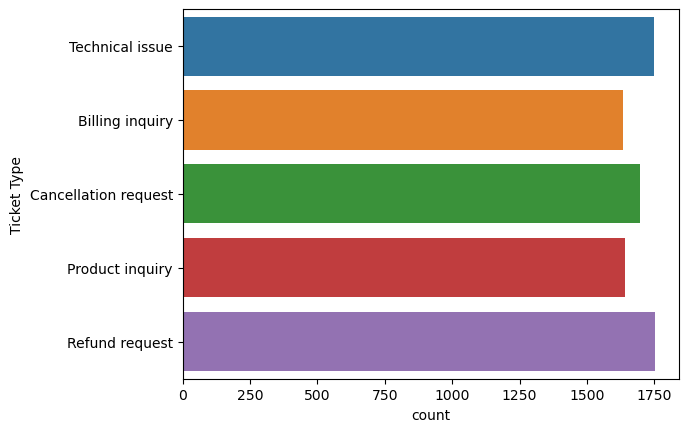

In [10]:
sns.countplot(df, y="Ticket Type")

### Because this is an NLP model, it will be good to know how many words we have in the description

Lets break out the words and do a count and then check the mean count for rach ticket type

In [11]:
def get_word_count(content):
    content = content.split(" ")
    return len(content)

In [12]:
df["Content Length"] = df["Ticket Description"].apply(get_word_count)
df[["Ticket Description", "Content Length"]]

,Ticket Description,Content Length
0,I'm having an issue with the {product_purchase...,40
1,I'm having an issue with the {product_purchase...,41
2,I'm facing a problem with my {product_purchase...,41
3,I'm having an issue with the {product_purchase...,40
4,I'm having an issue with the {product_purchase...,54
...,...,...
8464,My {product_purchased} is making strange noise...,46
8465,I'm having an issue with the {product_purchase...,40
8466,I'm having an issue with the {product_purchase...,38
8467,I'm having an issue with the {product_purchase...,52


<Axes: xlabel='Ticket Type'>

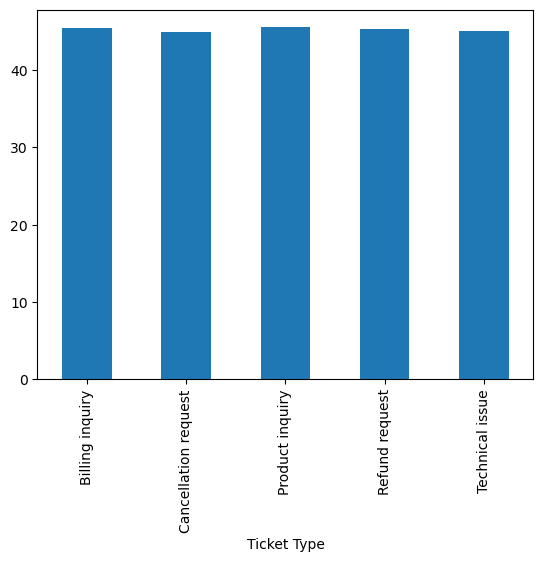

In [14]:
df.groupby("Ticket Type")["Content Length"].mean().plot(kind="bar")

### Can we append ticket subject to increase the amount of words?
Check to see how many unique values we have for ticket subject. 

In [15]:
df["Ticket Subject"].unique()

array(['Product setup', 'Peripheral compatibility', 'Network problem',
       'Account access', 'Data loss', 'Payment issue', 'Refund request',
       'Battery life', 'Installation support', 'Software bug',
       'Hardware issue', 'Product recommendation', 'Delivery problem',
       'Display issue', 'Cancellation request', 'Product compatibility'],
      dtype=object)

<Axes: xlabel='Ticket Type', ylabel='Ticket Subject'>

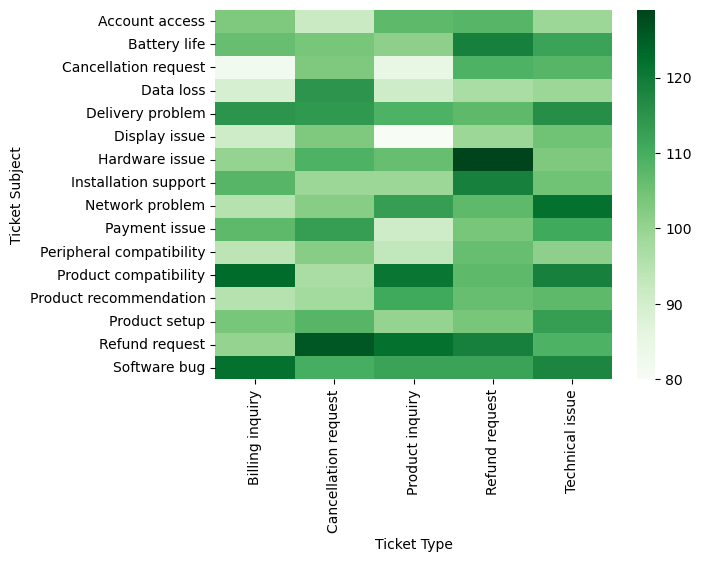

In [18]:
pivot = pd.pivot_table(df, index="Ticket Subject", columns="Ticket Type", values="Ticket ID", aggfunc="count")
sns.heatmap(pivot, cmap="Greens")

Ticket Subject and Ticket Type do not have a 1:1 correlation but they do have some. As Ticket Subject is not data fileld in before the Ticket Type, I believe we can use this

Conclusion:
NLP model will only need the ticket description and target variable for training. Ticket desription will need some modifications

### Next Steps
1. Data is mostly cleaned up for what we need. We will only need to remove columns
2. We will replace {product_purchased} from description with the corresponding product purchased column
3. Append Ticket Subject to Description